## __CLIP__

- [GitHub](https://github.com/openai/CLIP)

- [Hugging Face Document](https://huggingface.co/docs/transformers/model_doc/clip)

- 画像とテキストを同じベクトル空間に埋め込むモデル

##

### __準備__

In [5]:
!pip install transformers | tail -n1

In [6]:
from PIL import Image
from matplotlib import pyplot as plt
import requests

from transformers import CLIPProcessor, CLIPModel

In [7]:
# モデル名
model_name = "openai/clip-vit-base-patch32"

# 前処理器
processor = CLIPProcessor.from_pretrained(model_name)

# モデル
model = CLIPModel.from_pretrained(model_name)

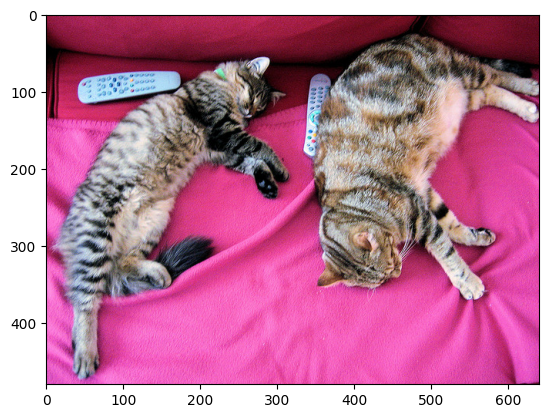

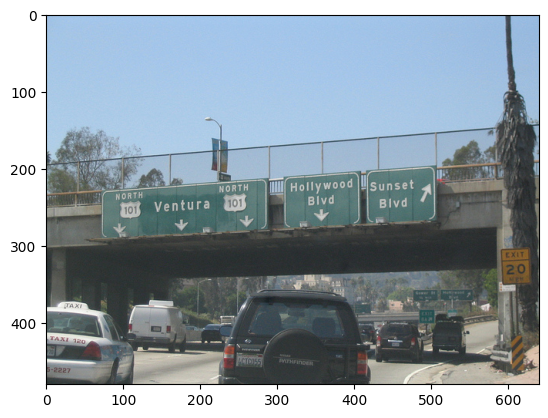

In [8]:
# 画像をダウンロード
urls =[
    "http://images.cocodataset.org/val2017/000000039769.jpg",
    "http://images.cocodataset.org/val2017/000000001532.jpg"
]

images = []
for url in urls:
    image = Image.open(requests.get(url, stream=True).raw)
    images.append(image)

    # 画像の表示
    plt.imshow(image)
    plt.show()

In [9]:
# 前処理
inputs = processor(
    text=[
        "a photo of a cat",
        "a photo of a bridge",
        "a photo of a house"
    ],
    images=images,
    return_tensors="pt",
    padding=True
)

inputs.keys()

dict_keys(['input_ids', 'attention_mask', 'pixel_values'])

In [10]:
# 推論
outputs = model(**inputs)
outputs.keys()

odict_keys(['logits_per_image', 'logits_per_text', 'text_embeds', 'image_embeds', 'text_model_output', 'vision_model_output'])

In [11]:
# 画像あたりのスコア

logits_per_image = outputs.logits_per_image
logits_per_image.softmax(dim=1)

tensor([[9.9866e-01, 5.9576e-04, 7.4582e-04],
        [5.6695e-04, 9.8704e-01, 1.2389e-02]], grad_fn=<SoftmaxBackward0>)

In [12]:
# テキストあたりのスコア

logits_per_text = outputs.logits_per_text
logits_per_text.softmax(dim=1)

tensor([[9.9956e-01, 4.3529e-04],
        [7.8623e-04, 9.9921e-01],
        [7.2767e-02, 9.2723e-01]], grad_fn=<SoftmaxBackward0>)